In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import KFold,cross_val_score, GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [2]:
newsgroups = datasets.fetch_20newsgroups(
                    subset='all', 
                    categories=['alt.atheism', 'sci.space']
             )

In [3]:
xvalues = newsgroups.data
target = newsgroups.target

In [4]:
target[:5]

array([0, 0, 1, 1, 1], dtype=int64)

In [5]:
vecs = TfidfVectorizer()
xvalues_vec = vecs.fit_transform(xvalues)

In [6]:
10

10

In [7]:
c_vals = [10**i for i in range(-5, 6)]
c_vals

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

In [8]:
kf = KFold(n_splits=5, shuffle=True, random_state=241)

In [9]:
score_vals = []

In [10]:
for c in tqdm_notebook(c_vals):
    print()
    cls = SVC(random_state=241, C=c,  kernel='linear')
    scores = cross_val_score(cls, xvalues_vec, target, cv=kf, scoring='accuracy')
    score_vals.append(np.mean(scores))

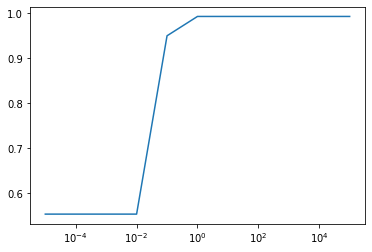

In [11]:
plt.plot(c_vals, score_vals);
plt.xscale('log')

In [12]:
grid = {'C': np.power(10.0, np.arange(-5, 6))}
cv = KFold(n_splits=5, shuffle=True, random_state=241)
clf = SVC(kernel='linear', random_state=241)
gs = GridSearchCV(clf, grid, scoring='accuracy', cv=cv)
gs.fit(xvalues_vec, target)

GridSearchCV(cv=KFold(n_splits=5, random_state=241, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=241,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [13]:
cls2 = SVC(random_state=241, C=1,  kernel='linear').fit(xvalues_vec, target)

In [14]:
absol = [abs(i) for i in cls2.coef_.sum(0)]

In [15]:
feature_mapping = vecs.get_feature_names()

In [16]:
top_idx = np.argsort(absol)[0][0][-10:]
top_values = [feature_mapping[i] for i in top_idx]

In [17]:
top_values.sort()

In [18]:
print(*top_values)

atheism atheists bible god keith moon religion sci sky space


In [19]:
task1 = open("../data/submissions/week3_task1_2.txt","w")
task1.write("atheism atheists bible god keith moon religion sci sky space") 
task1.close()